# Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import time
import matplotlib.pyplot as plt
from datetime import datetime
import gc
import functions
from collections import defaultdict

In [3]:
def updatelib():
    import importlib
    importlib.reload(functions)

## [RQ1]
A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing
funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?

## 1.a
What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

### Solution
From the plot below, we can see that most of the operation users perform is `view`. In fact, we can see that there is almost no battling between the three possible actions. Nevertheless, we can also say that there is a massive amount of `cart`, compared to the purchases operations: on average, users will perform 4 views, 0.25 carting and 0.10 purchase operations per session.

We are going to explore this phenomenon in greater detail, but we can already state that only $\approx \frac{1}{2}$ of the products put in the cart are ultimately bought.

<Figure size 432x288 with 0 Axes>

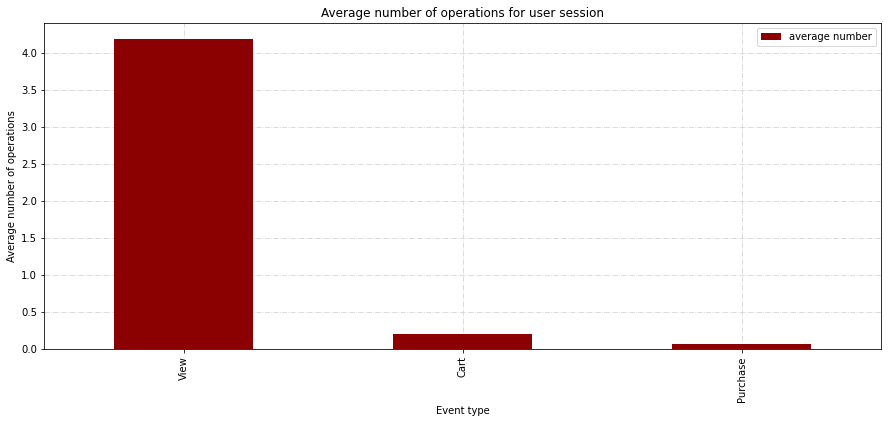

In [689]:
updatelib()
test = functions.plt_avg_event_session(functions.dfs)

### 1.b
How many times, on average, a user views a product before adding it to the cart?

### Solution
One could say that users have two options:
1. Search for a product $\rightarrow$ buy it;
2. Search for a product without buying it $\rightarrow$ go for the next one.

Actually, these are not the only options, since, on average, a users views a product ~4 times before actually buying it. This means that there are lots of users that check products multiple times, probably to make sure that they are watching the right product, to compare it with other items and so on.

In [89]:
updatelib()
functions.avg_view_before_cart(functions.dfs)

3.607123111121696

### 1.c
What’s the probability that products added once to the cart are effectively bought?

### Solution
As we were anticipating in exercise **1.a**, not all the products that are put into the cart are then effectively bought. In this exercise, we can see that products that are added just once to the cart, have a probability of ~0.36 of being purchased afterwards. This means that lots of products are just put into the cart, and then ignored completely.

In [945]:
updatelib()
functions.purchase_after_cart_prob(functions.dfs)

0.35519737510028904

### 1.d
What’s the average time an item stays in the cart before being removed?

### Solution
For this particular exercise, we concluded that it is not possible to compute the average time an item stays in the cart before being removed, since all the dataframes we're working with lack the `event_type = remove_from_cart`.

To prove that no dataframe provided any `remove_from_cart` instance, we analyzed the data we were assigned and analyzed the `event_type` column to check its unique values. For each dataframe, it appears that there are always 3 types of possible events, which are: `view`, `purchase` or `cart`. Therefore, it wasn't possible to compute this average time, since we cannot infer when a product is actually removed from cart, without making any assumptions on the data.

About these assumptions, we're saying that one could argue that if a product is put into the cart and never bought after, then that means that this item is being removed at some point. Even if this was the case (although one could, for example, just leave the item in the cart forever), it is not really possible to infer the time when the item was actually removed from just that information. Moreover, actively removing an item from the cart is a very different action to simply leaving it there, as the former shows that the customer is no longer interested in the item, while the latter could be cause by many other factors (like a momentary lack of funds).

In [76]:
updatelib()
functions.check_event_types(functions.dfs)

Unique values in the `event_type` column for dataframe `2019-Oct.csv` are:
['cart' 'purchase' 'view']
------------------------------
Unique values in the `event_type` column for dataframe `2019-Nov.csv` are:
['cart' 'purchase' 'view']
------------------------------
Unique values in the `event_type` column for dataframe `2019-Dec.csv` are:
['cart' 'purchase' 'view']
------------------------------
Unique values in the `event_type` column for dataframe `2020-Jan.csv` are:
['cart' 'purchase' 'view']
------------------------------
Unique values in the `event_type` column for dataframe `2020-Feb.csv` are:
['cart' 'purchase' 'view']
------------------------------
Unique values in the `event_type` column for dataframe `2020-Mar.csv` are:
['cart' 'purchase' 'view']
------------------------------
Unique values in the `event_type` column for dataframe `2020-Apr.csv` are:
['cart' 'purchase' 'view']
------------------------------


### 1.e
How much time passes on average between the first view time and a purchase/addition to cart?

### Solution
Analyzing the time between first view and first cart, and between first view and first purchase, we can see that much more time passes between viewing and carting compared to viewing and purchasing. This may be caused by the fact that products that are ultimately bought are also carted faster than products that end up remaining in the cart for a longer amount of time.

In [75]:
updatelib()
functions.avg_time_view_action(functions.dfs)

Average time between first view and first cart is 8:31:01.
Average time between first view and first purchase is 2:09:37.


## [RQ2]
What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.

### Solution
The most sold products between November 2019 and April 2020 are those in the construction category, with almost double the purchases compared to the second in line, which is the electronics category. The one with the least sold products is the stationery category.

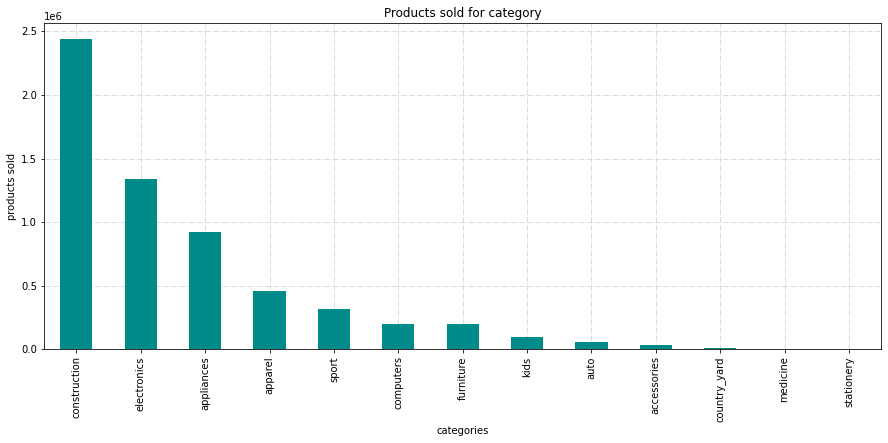

category
construction    2442248
electronics     1341139
appliances       925763
apparel          455370
sport            316243
computers        202396
furniture        197485
kids              93757
auto              54205
accessories       36854
country_yard      10849
medicine           2583
stationery         1872
Name: product_id, dtype: int64

In [82]:
updatelib()
functions.products_for_category(functions.dfs)

### 2.a
Plot the most visited subcategories.
The most visited subcategories are tools, kitchen and smartphone. This makes sense, since tools is a subcategory in the construction category, kitchen is under the appliances category and smartphones are found in the electronics category; all these belong to the most sold categories overall.

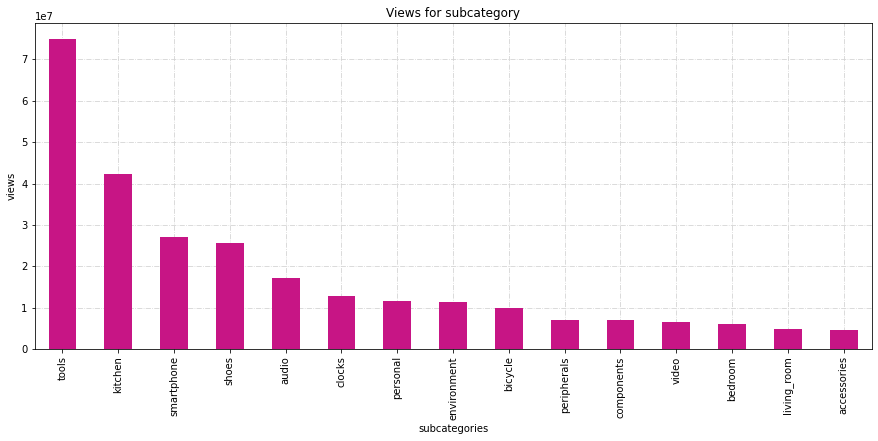

sub_category_1
tools         74948925
kitchen       42402815
smartphone    27110854
shoes         25588984
audio         17231348
                ...   
jacket           33790
belt             17577
watering           143
paper              120
hat                  5
Name: event_type, Length: 63, dtype: int64

In [84]:
updatelib()
functions.most_viewed_subcategories_month(functions.dfs)

### 2.b
What are the 10 most sold products per category?

### Solution
Since the products are represented by their id codes, we don’t have the possibility of knowing what they are. Which is why we visualise this table also for one single category, to show this more clearly.
Also this table includes 130 products, this is consistent with the number of categories we have (13).

#### Observations
For each category of the ecommerce dataframe, we computed the 10 most sold products. We can see this big schema here:

In [85]:
updatelib()
functions.best_in_cat(functions.dfs)

,category,product_id,event_type
0,accessories,4700478,1669
1,accessories,4700630,1127
2,accessories,4700419,508
3,accessories,16000973,484
4,accessories,16000974,465
...,...,...,...
125,stationery,12900363,42
126,stationery,12900362,41
127,stationery,12900142,41
128,stationery,12901271,37


Anyway, if we are interested in one particular category, we can obviously look at the 10 most sold products within this category. For example, if we want to see the overall best products in the category `electronics`, we can just call the same function with the parameter `cat`.

In [86]:
updatelib()
functions.best_in_cat(functions.dfs, cat='electronics')

,category,product_id,event_type
70,electronics,1004856,61265
71,electronics,1004767,44419
72,electronics,1005115,34787
73,electronics,4804056,30181
74,electronics,1004833,26183
75,electronics,1002544,22227
76,electronics,1004870,21288
77,electronics,1004249,17971
78,electronics,1005105,15776
79,electronics,1004836,15549


## [RQ3]
For each category, what’s the brand whose prices are higher on average?

### 3.a
Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

### Solution:
In this particular exercise, we chose to show the price distribution for the `electronics` category.
In the plot below, we decided to highlight several behaviours of the distribution using specific summary values, such as:
- **Mean** of the distribution (red horizontal dotted line)
- **Quantiles** (25%, 50%, 75%, 95%. Vertical dotted lines)
The first thing that we observe is that the mean price grows very slowly for the first 75% of the distribution; then, there is a steep increase in the last 25%, further emphasized in the last 5%.

However, there are tipically too many brands for a single category to be able to draw some information about the brands themselves. This is the reason why we decided to actually hide the name of the brands in the price distribution below: this plot was only meant to draw general information about the behaviour of the whole category with respect to the brands average price.

For the same reason, we decided to analyze in a more accurate way the brands in specific parts of the distribution. In Figure 2, we can see that:
- The first plot shows a set of brands with a price slightly higher than the average; these are the brands that fall just after the third quantile (75%). It's important to notice that these are just a set of candidates, since their behaviour is very similar to the ones before.
- The second plot shows all the brands that fall into the last quantile; they are the brands that have the highest price overall in the category.

#### Figure 1
Average price distribution for the category electronics.

/home/michele/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


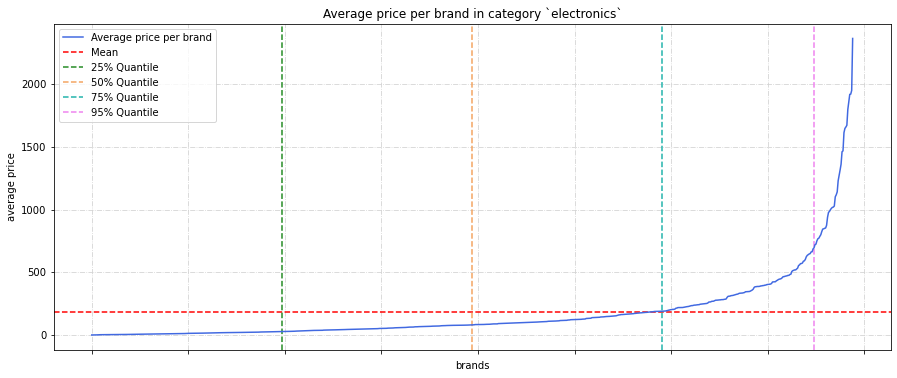

In [223]:
category = 'electronics'
updatelib()
avg_price_el = functions.avg_price_cat(functions.dfs, category)

#### Figure 2
Average price for a set of brands after the third quantile and after the last quantile.

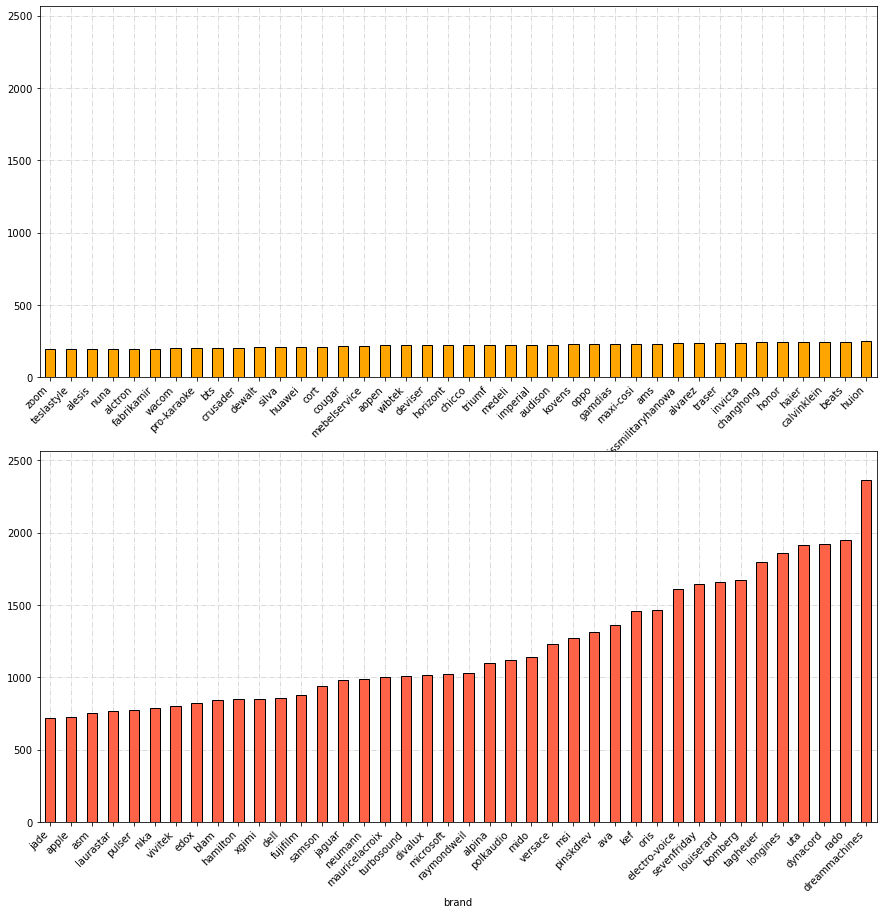

In [238]:
updatelib()
functions.plots_quantile_avg(avg_price_el)

### 3.b
Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [699]:
updatelib()

functions.highest_price_brands(functions.dfs)

,,price_avg
category,brand,
medicine,jade,267.434079
stationery,dewalt,933.791397
kids,volta,1836.155519
accessories,helix,1878.796081
country_yard,shua,2045.245112
auto,femi,2278.122992
sport,pinarello,2533.238401
computers,cime,2546.216227
appliances,pinarello,2547.260298


## [RQ4]
How much does each brand earn per month?

### 4.a
Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?

In [703]:
updatelib()
all_brands, apple_profits = functions.monthly_profit_all_brands(functions.dfs, 'apple')

In [704]:
all_brands

,Oct,Nov,Dec,Jan,Feb,Mar,Apr
a-case,275.26,808.32,1039.72,861.96,1335.77,1735.71,6071.23
a-derma,12.36,NaN,95.45,34.19,94.08,96.85,116.86
a-mega,1031.47,908.68,133.85,296.69,432.45,769.66,193.06
abk,69.36,NaN,NaN,NaN,NaN,NaN,NaN
abtoys,324.17,46.31,509.41,NaN,32.90,200.76,586.11
...,...,...,...,...,...,...,...
zhehua,NaN,NaN,NaN,NaN,NaN,NaN,3011.58
zhorya,NaN,NaN,NaN,NaN,NaN,NaN,54.10
zoizoi,NaN,NaN,NaN,NaN,NaN,NaN,24.15
zooexpress,NaN,NaN,NaN,NaN,NaN,NaN,44.30


In [705]:
apple_profits

,Oct,Nov,Dec,Jan,Feb,Mar,Apr
apple,1.112093e+08,1.275125e+08,157396674.9,1.258441e+08,1.917556e+08,1.413153e+08,74288067.38


### 4.b
Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing both the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [710]:
updatelib()
functions.top_losses(all_brands)

apple lost 47.43% between Mar and Apr
samsung lost 22.37% between Dec and Jan
xiaomi lost 29.05% between Feb and Mar


## [RQ5]
In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of
the week show the hourly average of visitors your store has.

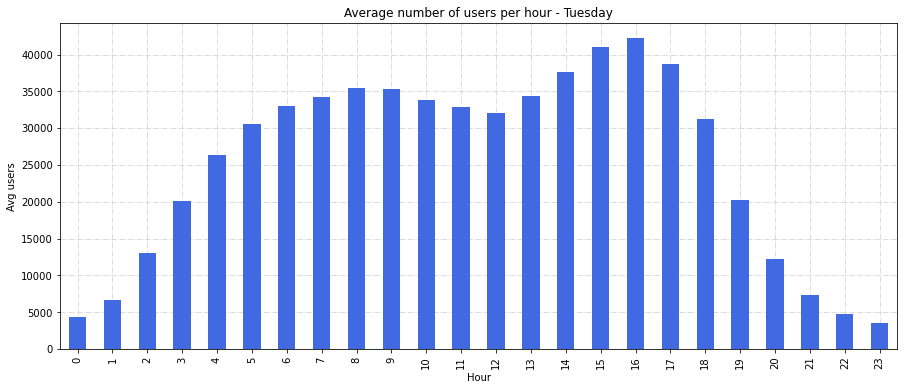

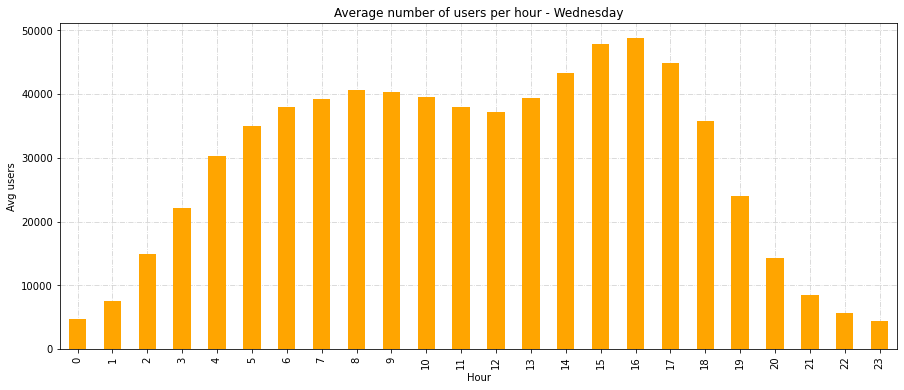

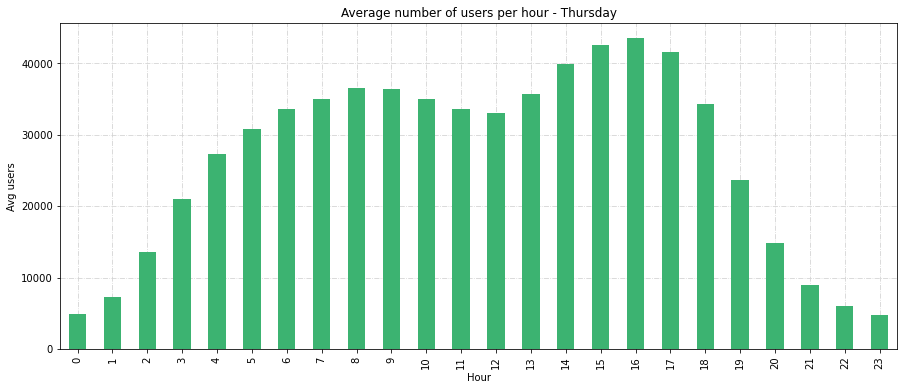

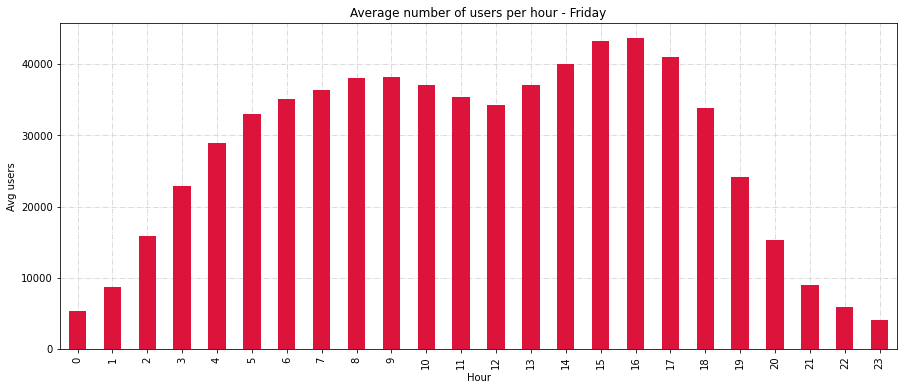

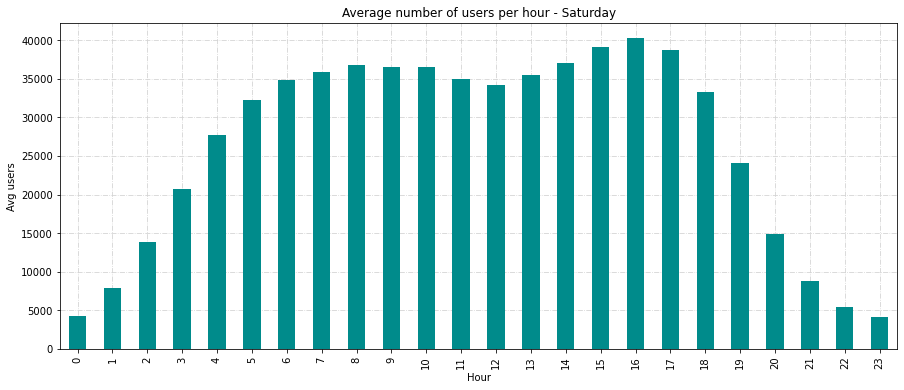

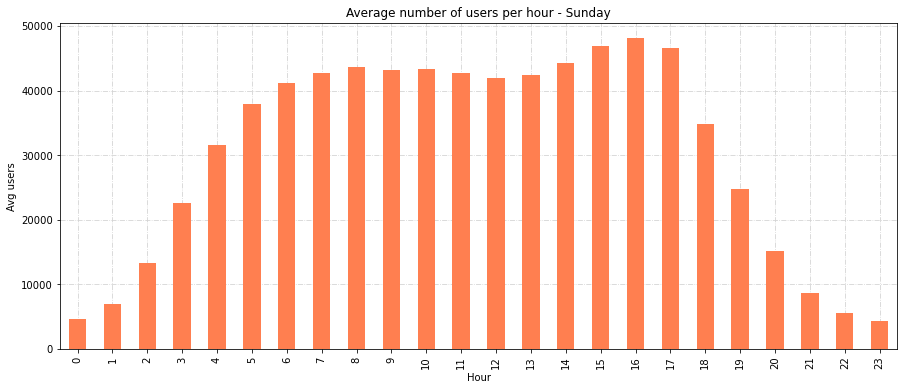

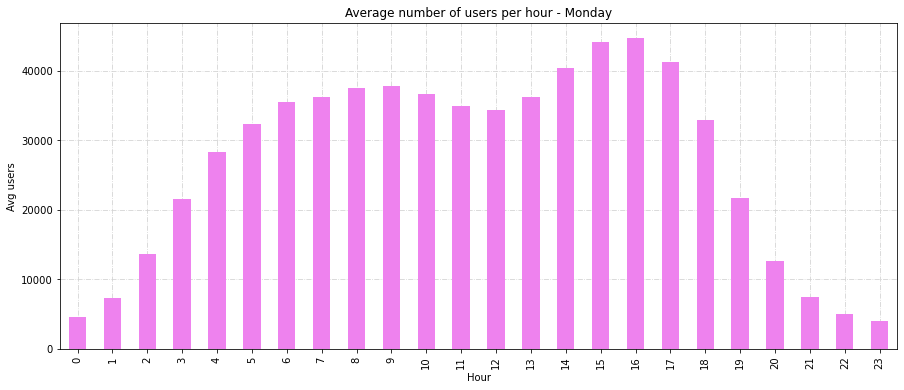

In [803]:
updatelib()
week_days = functions.avg_users(functions.dfs)

## [RQ6]
The conversion rate of a product is given by the purchase rate over the number of times the product has been visited. What's the conversion rate of your online store?

### 6.a
Find the overall conversion rate of your store.

In [712]:
updatelib()
functions.conversion_rate(functions.dfs)

0.017754711458446676

### 6.b
Plot the purchase rate of each category and show the conversion rate of each category in decreasing order.

<Figure size 432x288 with 0 Axes>

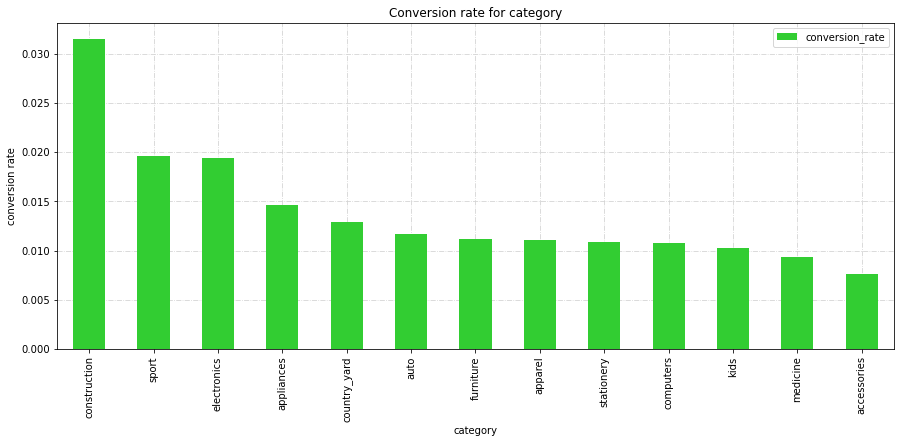

,conversion_rate
construction,0.031520
sport,0.019587
electronics,0.019380
appliances,0.014598
country_yard,0.012896
auto,0.011668
furniture,0.011187
apparel,0.011070
stationery,0.010860
computers,0.010804


In [77]:
updatelib()
functions.category_conv_rate(functions.dfs)

## [RQ7]
The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your
customers.

Prove that the pareto principle applies to your store.

In [714]:
print('20% of the users in the ecommerce provide for {:.2f} of the entire business.'.format(functions.pareto_principle(functions.dfs)))

20% of the users in the ecommerce provide for 74.55 of the entire business.


In [715]:
print('25% of the users in the ecommerce provide for {:.2f} of the entire business.'.format(functions.pareto_principle(functions.dfs, 25)))

25% of the users in the ecommerce provide for 79.30 of the entire business.


#### Observations

As we can see in the previous cells, the Pareto principle is respected (with a 75/25 ratio).

Moreover, we can also analyze the behaviour with respect to the percentage of users considered. If we look at the plot below, we can see that 10% of the users already provide for more than half of the whole business. Also, from the 50% point on, we can see that the whole business is almost completely conducted by the first half of the users.

<Figure size 432x288 with 0 Axes>

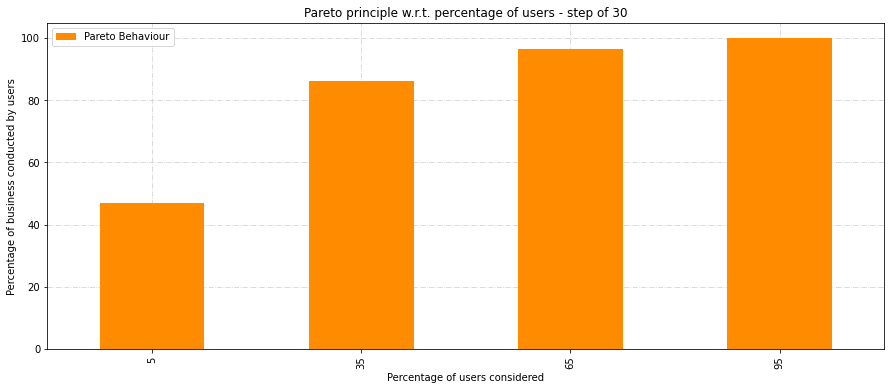

In [78]:
updatelib()
functions.plot_pareto(functions.dfs)